In [2]:
import numpy as np
import pandas as pd
import random
!ls

Untitled.ipynb shopify.csv


In [4]:
df = pd.read_csv('shopify.csv')
df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017 16:00:00,58.22,58.40,56.60,57.65,83632
1,1/4/2017 16:00:00,57.96,59.02,57.15,58.86,84716
2,1/5/2017 16:00:00,58.80,63.43,58.50,63.16,268340
3,1/6/2017 16:00:00,62.98,63.05,60.34,62.03,198457
4,1/9/2017 16:00:00,62.12,62.86,61.75,62.54,79175


In [5]:
from statsmodels.tsa.stattools import adfuller

def is_stationary(series_x): 
    """
    Input expected: Pandas series
    """
    series_x.plot(title=series_x.name)
    
    result = adfuller(series_x)
    # Access the contents of the results:
    print('ADF Statistic: %f' % result[0])
    print('p-value:        %f ' % result[1])
    print('Lags used:      %d' % result[2])
    print('Critical Values:')
    for key, value in result[4].items():
        print((key, value))
    

    p_value = result[1]
    if p_value <= 0.05: 
        return True 
    elif p_value > 0.05: 
        return False

ADF Statistic: 0.544200
p-value:        0.986156 
Lags used:      11
Critical Values:
('1%', -3.4392418578608983)
('5%', -2.86546426916434)
('10%', -2.568859710342903)


False

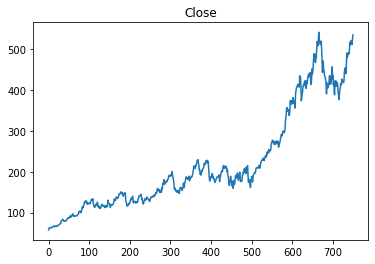

In [6]:
is_stationary(df['Close'])

In [9]:
df['pct_change'] = df['Close'].pct_change()
df.dropna(inplace=True)

ADF Statistic: -27.691481
p-value:        0.000000 
Lags used:      0
Critical Values:
('1%', -3.43912257105195)
('5%', -2.8654117005229844)
('10%', -2.568831705010152)


True

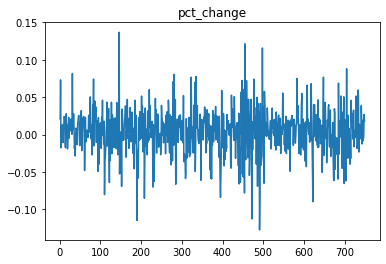

In [10]:
is_stationary(df['pct_change'])

In [11]:
df['diff'] = df['Close'].diff()
df.dropna(inplace=True)

ADF Statistic: -7.119309
p-value:        0.000000 
Lags used:      10
Critical Values:
('1%', -3.4392539652094154)
('5%', -2.86546960465041)
('10%', -2.5688625527782327)


True

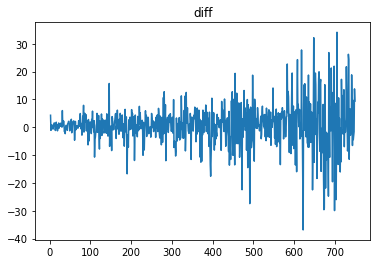

In [12]:
is_stationary(df['diff'])

In [13]:
df['log_diff'] = np.log(df['diff'])
df.dropna(inplace=True)

/opt/anaconda3/envs/masterenv/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


ADF Statistic: -2.822835
p-value:        0.055085 
Lags used:      8
Critical Values:
('1%', -3.4459042013025836)
('5%', -2.8683970525583358)
('10%', -2.5704225783970176)


False

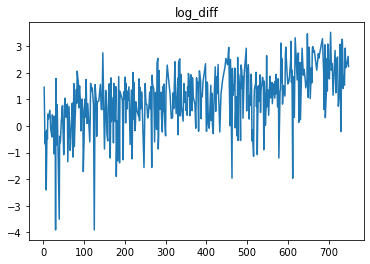

In [14]:
is_stationary(df['log_diff'])